In [1]:
# Import library & modul dari python untuk akses dataset, mengakses dataframe, dan visualisasi

import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import entropy
from scipy.special import entr
from scipy.io import loadmat
from scipy.signal import stft
from scipy.stats import kurtosis
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# Akses direktori lokal penyimpanan dataset
dataset_path = r"D:\Users\user\Documents\kuliah\SKRIPSWEET\MODELLING\WindTurbineHighSpeedBearingPrognosis-Data-main"

In [3]:
# Data vibrasi pada bantalan yang diperoleh disegmentasi berdasarkan waktu pengambilan data
# Data disimpan dalam format .mat

filename_list = [] # Pembuatan list kosong untuk menampung data pada tiap file

# Pembacaan tiap file yang tersimpan di direktori
for filename in sorted(os.listdir(dataset_path)):
    filename_list.append(loadmat('D:\\Users\\user\\Documents\\kuliah\\SKRIPSWEET\\MODELLING\\WindTurbineHighSpeedBearingPrognosis-Data-main\\' + filename)['vibration'].flatten()) #Pengambilan dataset vibrasi
    
filename_list = np.asarray(filename_list) # Pengubahan bentuk menjadi array
fs = int(filename_list.shape[1] / 6.0) # Penghitungan scan frequency dari sensor    # 6 = 6 detik
t = np.linspace(0.0, 6.0, filename_list.shape[1]) # Pembuatan variabel rentang waktu dari pengambilan data

In [4]:
print('Scan Frequency: {:,d} Hz'.format(fs))

Scan Frequency: 97,656 Hz


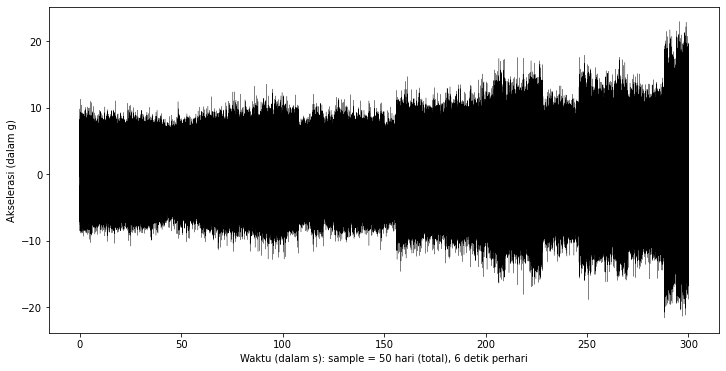

In [5]:
plt.subplots(figsize = (12.0, 6.0))
for i in range(filename_list.shape[0]):
    plt.plot(t + i * 6.0, filename_list[i], color = 'black',lw = 0.25)
    
plt.xlabel('Waktu (dalam s): sample = 50 hari (total), 6 detik perhari')
plt.ylabel('Akselerasi (dalam g)')
plt.show()

In [6]:
raw_data = pd.DataFrame(filename_list) # Pembuatan dataframe dari array filename_list
raw_data_transpose = raw_data.T # Transpose dataframe

raw_data_transpose

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.414619,0.474068,1.039888,4.649311,1.952522,-0.043846,-0.692040,-4.326567,0.404417,-0.547078,...,1.222014,2.444987,2.724981,0.448374,-2.186443,-2.388492,0.187700,-2.741766,-1.042165,0.178114
1,0.172490,0.594640,-0.517298,5.189054,2.401523,-0.904635,-2.198072,-2.553611,2.595819,-3.122125,...,1.470246,2.654641,3.533176,1.495940,-1.487043,-1.149016,0.828819,-2.420942,-0.403974,1.728471
2,-0.403777,1.403069,0.666161,1.300168,1.930716,-0.114591,-3.635917,-1.933030,1.607406,-4.310298,...,3.191321,1.735989,3.057212,0.870327,-0.712640,1.490920,1.089050,-1.302260,1.689252,1.039679
3,-0.773542,1.377042,1.033624,-1.904185,0.984906,-0.391718,-1.855540,-0.114518,1.898032,-2.921049,...,3.685152,-0.520916,2.759043,-0.825324,-0.110580,4.800179,2.051473,-1.134335,3.281326,-0.549490
4,0.686626,-0.244885,1.623256,-3.311154,1.287284,0.088097,-0.030568,0.158203,0.299104,-0.918947,...,3.545617,-0.742039,0.386771,-1.519531,0.147473,3.828736,2.821064,-1.658697,3.282827,-0.872086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585931,2.533995,0.389207,3.300239,-2.821212,5.040573,-1.911568,0.433668,-2.257349,0.319987,1.037415,...,1.192123,-0.530687,1.932599,-1.286951,-1.771245,3.779968,-0.552357,2.149968,1.696070,-0.504045
585932,2.781071,1.376390,4.782840,-1.501109,0.991219,-3.149838,0.189743,-0.028746,-0.049432,1.128945,...,-2.206120,-0.474450,3.970868,-2.201468,0.771314,3.006833,-1.630726,1.892482,1.105207,-0.376828
585933,2.177312,2.174765,4.798629,-0.707078,-0.382378,-1.714307,1.197685,3.533508,0.091789,0.204301,...,-4.799564,0.239188,0.669176,-0.385208,2.068652,0.968687,-1.764034,-0.537984,1.200712,-1.153175
585934,-1.481063,2.201308,2.822196,-0.846933,-0.242030,-1.132255,-0.683426,4.250529,0.031614,1.178648,...,-3.237554,0.123809,0.278098,0.236123,1.081642,-2.857563,-3.733551,-1.087905,0.121421,1.648594


In [7]:
#Mendefinisikan fungsi untuk menghitung Root Mean Square (RMS)
def calculate_rms(df):
    result = [] # Membuat list kosong untuk menampung hasil perhitungan
    for col in df:
        r = np.sqrt((df[col]**2).sum() / len(df[col])) # Input merupakan nilai pembacaan sensor getaran pada bearing yang dikuadratkan untuk setiap data perbaris kemudian hsilnya ditambahkan semua dari tiap baris dan dibagi dengan jumlah data, hasil akhirnya kemudian diakar
        result.append(r) #Hasil perhitungan ditambahkan ke list
    return result #Output berupa list hasil perhitungan setiap bantalan untuk RMS

#Mendefinisikan fungsi untuk menghitung Peak to Peak (P2P)
def calculate_p2p(df):
    return np.array(df.max().abs() - df.min().abs()) #Input merupakan nilai maximum dan minimum dari pembacaan sensor tiap bearing pada 1 data. Output berupa hasil penjumlahan kedua nilai tersebut

#Mendefinisikan fungsi untuk menghitung entropy
def calculate_entropy(df):
    ent = [] #Membuat list kosong untuk menampung hasil perhitungan
    for col in df:
        ent.append(entropy(df[col].value_counts())) #Input merupakan nilai pembacaan sensor getaran pada tiap bantalan yang kemudian dihitung entropynya dan tambahkan ke dalam list hasil
    return np.array(ent) #Output berupa hasil array

#Mendefinisikan fungsi untuk menghitung faktor clearance
def calculate_clearance(df):
    result = [] #Membuat list kosong untuk menampung hasil perhitungan
    for col in df:
        r = ((np.sqrt(df[col].abs())).sum() / len(df[col]))**2 #Input merupakan nilai pembacaaan sensor getaran pada tiap bantalan yang dicari nilai absolutnya kemudian ditambahkan semua dan dibagi jumlah datanya, kemudian diakarkan dan hasilnya dipangkat 2
        result.append(r) #Hasil perhitungan ditambahkan ke list
    return result #Output berupa list hasil perhitungan setiap bearing untuk clearance

In [8]:
# Melakukan perhitungan sesuai dengan time features
# Input berupa pembacaaan sensor pada tiap file
# Output berupa nilai hasil perhitungan sesuai dengan list pada time features dalam bentuk array


mean_abs = np.array(raw_data_transpose.abs().mean()) #Mencari nilai mean absolut menggunakan .abs() dan .mean()

standard_deviation = np.array(raw_data_transpose.std()) #Mencari nilai standar deviasi menggunakan .std()

skewness = np.array(raw_data_transpose.skew()) #Mencari nilai skewness dari data menggunakan .skew()

kurtosis = np.array(raw_data_transpose.kurtosis()) 

entropy = calculate_entropy(raw_data_transpose) #mencari nilai entropi menggunakan fungsi calculate_entropy

rms = np.array(calculate_rms(raw_data_transpose)) #Mencari nilai RMS dengan menggunakan fungsi calculate_rms

max_abs = np.array(raw_data_transpose.abs().max()) #Mencari nilai maximum absolut dari data menggunakan .abs() dan .max()

p2p = calculate_p2p(raw_data_transpose) #Mencari nilai peak to peak dengan menggunakan fungsi calculate_p2p

crest = max_abs/rms #Mencari nilai crest factor

clearance = np.array(calculate_clearance(raw_data_transpose)) #Mencari nilai clearance dengn fungsi calculate_clearence()

shape = rms / mean_abs #Mencari nilai shape

impulse = max_abs / mean_abs #Mencari nilai impulse

In [9]:
#Pembuatan Dataframe untuk hasil perhitungan fitur time domain

time_features = pd.DataFrame({'Rata-rata_Absolut': mean_abs, 'Standar_Deviasi': standard_deviation, 'Skewness': skewness, 'Kurtosis': kurtosis, 'Entropi':entropy,
                              'Root_Mean_Square_(RMS)':rms, 'Maximum_Absolut':max_abs, 'Peak_to_Peak_(P2P)':p2p,
                              'Faktor_Puncak':crest, 'Faktor_Clearence':clearance, 'Faktor_Shape':shape, 'Impuls':impulse}, columns=["Rata-rata_Absolut", "Standar_Deviasi", "Skewness", "Kurtosis", "Entropi",
                                                                                                                                   "Root_Mean_Square_(RMS)", "Maximum_Absolut", "Peak_to_Peak_(P2P)", "Faktor_Puncak",
                                                                                                                                   "Faktor_Clearence", "Faktor_Shape", "Impuls"])

time_features #Menampilkan hasil dari perhitungan untuk fitur time domain

,Rata-rata_Absolut,Standar_Deviasi,Skewness,Kurtosis,Entropi,Root_Mean_Square_(RMS),Maximum_Absolut,Peak_to_Peak_(P2P),Faktor_Puncak,Faktor_Clearence,Faktor_Shape,Impuls
0,1.832206,2.270483,0.003870,-0.004378,12.768751,2.296702,11.287679,0.954289,4.914735,1.552322,1.253517,6.160703
1,1.655326,2.062148,0.003010,0.019467,12.726319,2.076542,10.201767,1.093627,4.912863,1.401776,1.254461,6.162997
2,1.686617,2.103555,-0.001029,0.022406,12.736041,2.114894,11.027756,0.581436,5.214330,1.428477,1.253927,6.538388
3,1.608343,2.008065,0.001477,0.041467,12.713978,2.019404,10.674653,1.829304,5.286041,1.361360,1.255580,6.637048
4,1.650317,2.060564,0.001012,0.044484,12.726632,2.071768,10.846172,-0.475386,5.235226,1.397192,1.255376,6.572174
5,1.674787,2.079129,-0.008428,0.018007,12.730569,2.099721,10.071461,0.093068,4.796572,1.418799,1.253724,6.013577
6,1.581854,1.971982,-0.001429,0.017419,12.707029,1.983443,9.619002,0.401022,4.849649,1.339883,1.253872,6.080840
7,1.457977,1.811430,0.002216,0.005757,12.666038,1.827789,8.971681,-0.081710,4.908489,1.234930,1.253648,6.153515
8,1.597980,1.997333,0.001559,0.071093,12.710461,2.008323,10.909793,0.699154,5.432289,1.351780,1.256789,6.827242
9,1.593219,1.984205,-0.001959,0.007185,12.709072,1.997857,10.085749,1.339522,5.048283,1.349143,1.253975,6.330421


In [10]:
#import modul untuk dekomposisi musiman pada deret waktu
from statsmodels.tsa.seasonal import seasonal_decompose, DecomposeResult

rawdata = time_features.copy()

rawdata['dates'] = pd.date_range(start='03/07/2013', end='04/25/2013') #Menambahkan dates sebagai kolom baru
rawdata.set_index('dates', drop=True, inplace=True) #menghapus kolom dates dari dataframe dan mengatur kolom dates sebagai index

#Variabel RUL akan ditambahkan pada dataframe
RUL = [] #List kosong untuk RUL
for i in range (50,0,-1): #Membuat iterasi angka dari 50 hingga 1
    RUL.append(i) #Setiap iterasi dimasukkan ke dalam list RUL
rawdata['RUL'] = np.asarray(RUL).flatten() #Memasukkan list RUL ke dalam dataframe
rawdata

,Rata-rata_Absolut,Standar_Deviasi,Skewness,Kurtosis,Entropi,Root_Mean_Square_(RMS),Maximum_Absolut,Peak_to_Peak_(P2P),Faktor_Puncak,Faktor_Clearence,Faktor_Shape,Impuls,RUL
dates,,,,,,,,,,,,,
2013-03-07,1.832206,2.270483,0.003870,-0.004378,12.768751,2.296702,11.287679,0.954289,4.914735,1.552322,1.253517,6.160703,50
2013-03-08,1.655326,2.062148,0.003010,0.019467,12.726319,2.076542,10.201767,1.093627,4.912863,1.401776,1.254461,6.162997,49
2013-03-09,1.686617,2.103555,-0.001029,0.022406,12.736041,2.114894,11.027756,0.581436,5.214330,1.428477,1.253927,6.538388,48
2013-03-10,1.608343,2.008065,0.001477,0.041467,12.713978,2.019404,10.674653,1.829304,5.286041,1.361360,1.255580,6.637048,47
2013-03-11,1.650317,2.060564,0.001012,0.044484,12.726632,2.071768,10.846172,-0.475386,5.235226,1.397192,1.255376,6.572174,46
2013-03-12,1.674787,2.079129,-0.008428,0.018007,12.730569,2.099721,10.071461,0.093068,4.796572,1.418799,1.253724,6.013577,45
2013-03-13,1.581854,1.971982,-0.001429,0.017419,12.707029,1.983443,9.619002,0.401022,4.849649,1.339883,1.253872,6.080840,44
2013-03-14,1.457977,1.811430,0.002216,0.005757,12.666038,1.827789,8.971681,-0.081710,4.908489,1.234930,1.253648,6.153515,43
2013-03-15,1.597980,1.997333,0.001559,0.071093,12.710461,2.008323,10.909793,0.699154,5.432289,1.351780,1.256789,6.827242,42


In [11]:
#Mencari nilai koefisien korelasi dari fitur time domain terhadap RUL
correlation = rawdata.corr()['RUL']
print(correlation)

Rata-rata_Absolut        -0.598443
Standar_Deviasi          -0.655518
Skewness                 -0.096235
Kurtosis                 -0.808142
Entropi                  -0.577718
Root_Mean_Square_(RMS)   -0.647916
Maximum_Absolut          -0.795162
Peak_to_Peak_(P2P)        0.337846
Faktor_Puncak            -0.785217
Faktor_Clearence         -0.571873
Faktor_Shape             -0.832291
Impuls                   -0.799514
RUL                       1.000000
Name: RUL, dtype: float64


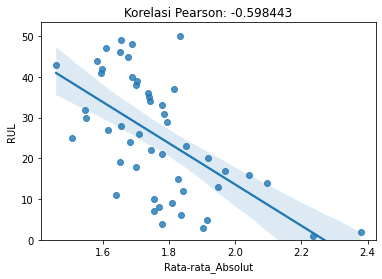

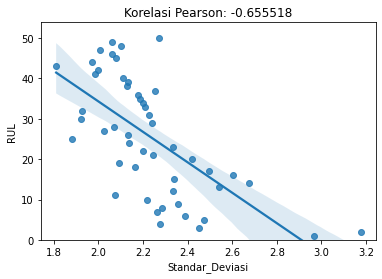

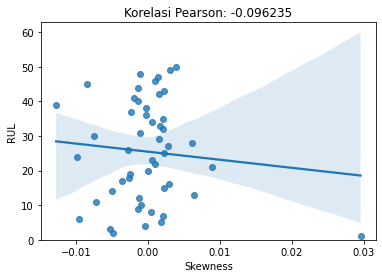

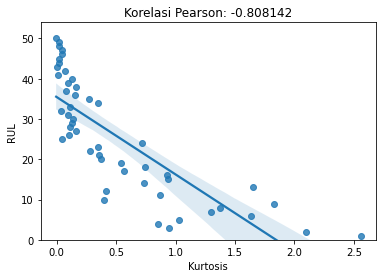

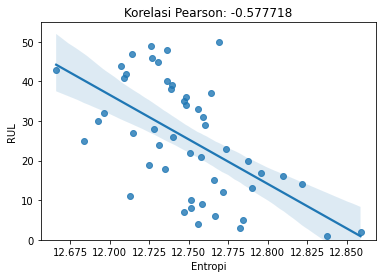

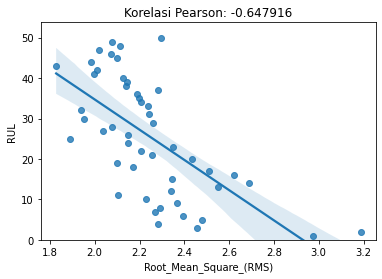

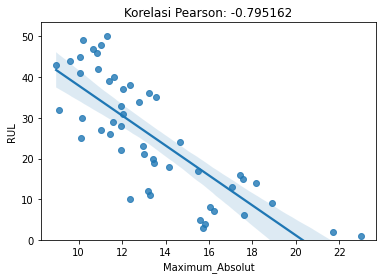

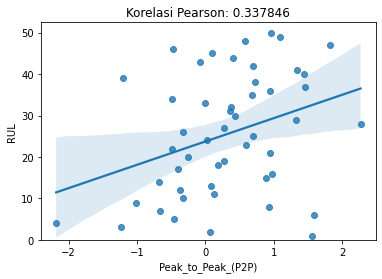

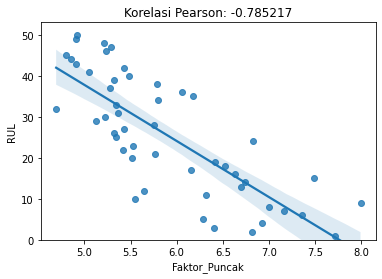

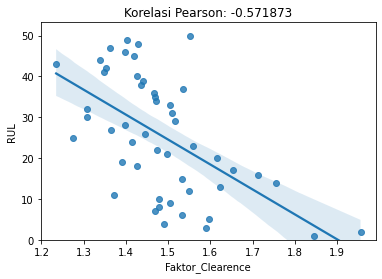

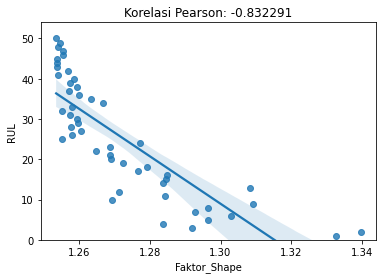

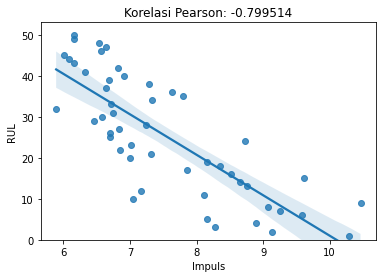

In [12]:
import seaborn as sns

# Melakukan loop pada setiap kolom dalam DataFrame
for kolom_time_domain in rawdata.columns:
    # Mengecualikan kolom 'RUL' agar tidak dianalisis
    if kolom_time_domain != 'RUL':
        # Menghitung korelasi Pearson antara kolom time domain dan kolom 'RUL'
        korelasi = rawdata[[kolom_time_domain, 'RUL']].corr().iloc[0, 1]

        # Membuat scatter plot dengan regresi linier
        sns.regplot(x=kolom_time_domain, y='RUL', data=rawdata)

        # Menyertakan korelasi Pearson sebagai judul plot
        plt.title(f"Korelasi Pearson: {korelasi:.6f}")

        # Mengatur batas sumbu Y dimulai dari 0
        plt.ylim(0, None)

        # Menyimpan gambar dalam format PNG
        plt.savefig(f"Correlation_{kolom_time_domain}.png", dpi=300)

        # Menampilkan plot
        plt.show()

In [13]:
health_indicator = rawdata.loc[:,['Standar_Deviasi','Kurtosis', 'Root_Mean_Square_(RMS)', 'Maximum_Absolut', 'Faktor_Puncak', 'Faktor_Shape', 'Impuls']]
target = rawdata['RUL']
target = target.reset_index(drop=True)

health_indicator

,Standar_Deviasi,Kurtosis,Root_Mean_Square_(RMS),Maximum_Absolut,Faktor_Puncak,Faktor_Shape,Impuls
dates,,,,,,,
2013-03-07,2.270483,-0.004378,2.296702,11.287679,4.914735,1.253517,6.160703
2013-03-08,2.062148,0.019467,2.076542,10.201767,4.912863,1.254461,6.162997
2013-03-09,2.103555,0.022406,2.114894,11.027756,5.214330,1.253927,6.538388
2013-03-10,2.008065,0.041467,2.019404,10.674653,5.286041,1.255580,6.637048
2013-03-11,2.060564,0.044484,2.071768,10.846172,5.235226,1.255376,6.572174
2013-03-12,2.079129,0.018007,2.099721,10.071461,4.796572,1.253724,6.013577
2013-03-13,1.971982,0.017419,1.983443,9.619002,4.849649,1.253872,6.080840
2013-03-14,1.811430,0.005757,1.827789,8.971681,4.908489,1.253648,6.153515
2013-03-15,1.997333,0.071093,2.008323,10.909793,5.432289,1.256789,6.827242


In [14]:
analisis = health_indicator.copy()

In [15]:
#Import modul untuk Normalisasi Data
from sklearn.preprocessing import MinMaxScaler


# Buat objek MinMaxScaler
scaler = MinMaxScaler()

# FIturkan data
scaler.fit(analisis)

# Normalisasi data
normalized_data = pd.DataFrame(scaler.transform(analisis), columns=['Standar_Deviasi','Kurtosis', 'Root_Mean_Square_(RMS)', 'Maximum_Absolut', 'Faktor_Puncak', 'Faktor_Shape', 'Impuls'])
normalized_data

,Standar_Deviasi,Kurtosis,Root_Mean_Square_(RMS),Maximum_Absolut,Faktor_Puncak,Faktor_Shape,Impuls
0,0.336628,0.000000,0.345119,0.165458,0.066994,0.000000,0.058878
1,0.183854,0.009311,0.183082,0.087879,0.066426,0.010971,0.059379
2,0.214218,0.010458,0.211309,0.146889,0.157828,0.004760,0.141482
3,0.144194,0.017901,0.141029,0.121663,0.179570,0.023968,0.163060
4,0.182692,0.019079,0.179568,0.133916,0.164164,0.021590,0.148871
5,0.196306,0.008740,0.200142,0.078570,0.031168,0.002405,0.026700
6,0.117734,0.008511,0.114561,0.046246,0.047261,0.004126,0.041411
7,0.000000,0.003957,0.000000,0.000000,0.065100,0.001517,0.057306
8,0.136324,0.029469,0.132873,0.138461,0.223911,0.038010,0.204657
9,0.126697,0.004515,0.125170,0.079591,0.107484,0.005323,0.095997


In [16]:
data_final = normalized_data.join(target)

data_final

,Standar_Deviasi,Kurtosis,Root_Mean_Square_(RMS),Maximum_Absolut,Faktor_Puncak,Faktor_Shape,Impuls,RUL
0,0.336628,0.000000,0.345119,0.165458,0.066994,0.000000,0.058878,50
1,0.183854,0.009311,0.183082,0.087879,0.066426,0.010971,0.059379,49
2,0.214218,0.010458,0.211309,0.146889,0.157828,0.004760,0.141482,48
3,0.144194,0.017901,0.141029,0.121663,0.179570,0.023968,0.163060,47
4,0.182692,0.019079,0.179568,0.133916,0.164164,0.021590,0.148871,46
5,0.196306,0.008740,0.200142,0.078570,0.031168,0.002405,0.026700,45
6,0.117734,0.008511,0.114561,0.046246,0.047261,0.004126,0.041411,44
7,0.000000,0.003957,0.000000,0.000000,0.065100,0.001517,0.057306,43
8,0.136324,0.029469,0.132873,0.138461,0.223911,0.038010,0.204657,42
9,0.126697,0.004515,0.125170,0.079591,0.107484,0.005323,0.095997,41


In [17]:
#Train test split data

X = data_final.iloc[:, 0:7]
y = data_final['RUL']

In [18]:
# split data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("data X train: ", X_train.shape)
print("data X test: ", X_test.shape)
print("data y train: ", y_train.shape)
print("data y test: ", y_test.shape)

data X train:  (40, 7)
data X test:  (10, 7)
data y train:  (40,)
data y test:  (10,)


In [19]:
#Import Modul untuk Algoritma GB

from sklearn.ensemble import GradientBoostingRegressor
from tqdm import tqdm

In [20]:
# Inisialisasi model
gb_regressor_try = GradientBoostingRegressor()

# Melatih model dengan parameter default
for i in tqdm(range(100)):
    gb_regressor_try.fit(X_train.values, y_train.values)  # Pelatihan model

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:04<00:00, 23.14it/s]


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#melakukan prediksi pada data pelatihan
y_train_pred = gb_regressor_try.predict(X_train.values)
# Menghitung RMSE pada data pelatihan
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Melakukan prediksi pada data uji
y_test_pred = gb_regressor_try.predict(X_test.values)
# Menghitung RMSE pada data uji
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

#Menghitung R square
r2 = r2_score(y_test.values, y_test_pred)

# Menampilkan hasil RMSE train dan RMSE test
print("RMSE Train: ", rmse_train)
print("RMSE Test: ", rmse_test)
print("r2: ", r2)

RMSE Train:  0.17260697759479862
RMSE Test:  6.505428626058079
r2:  0.7573916440682418


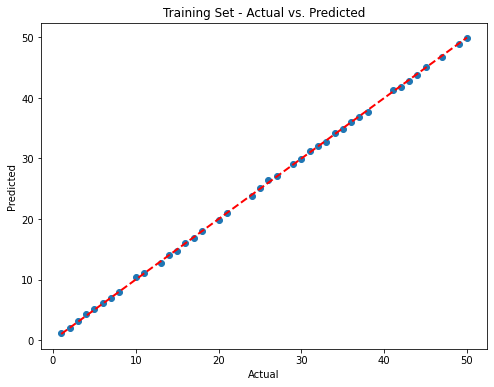

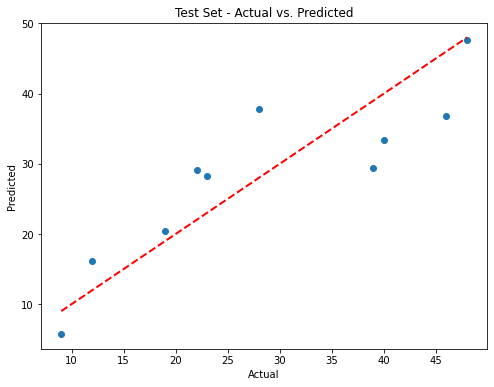

In [22]:
# Membuat grafik prediksi vs. aktual untuk data pelatihan
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set - Actual vs. Predicted")
plt.show()

# Membuat grafik prediksi vs. aktual untuk data uji
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set - Actual vs. Predicted")
plt.show()

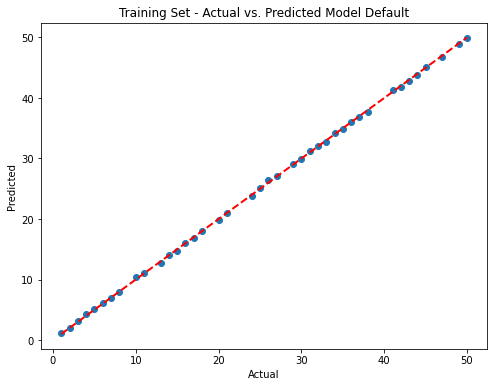

In [23]:
# Membuat grafik prediksi vs. aktual untuk data pelatihan
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set - Actual vs. Predicted Model Default")
plt.savefig("training_plot_model_default.png")
plt.show()

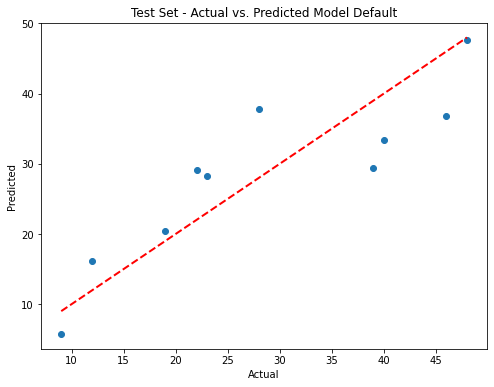

In [24]:
# Membuat grafik prediksi vs. aktual untuk data uji
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set - Actual vs. Predicted Model Default")
plt.savefig("test_plot_model_default.png")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(((y_true - y_pred) ** 2).mean())

scorer = make_scorer(rmse, greater_is_better=False)

#Mencari hyperparameter terbaik
param_grid = {'n_estimators': range(70, 200),
             'learning_rate': np.arange(0.1, 0.6, 0.1),
             'max_depth': range(2, 4)}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

#Menampilkan parameter terbaik
print("Best Hyperparameter: ", grid_search.best_params_)

Best Hyperparameter:  {'learning_rate': 0.4, 'max_depth': 3, 'n_estimators': 70}


In [26]:
#Inisiasi model menggunakan kombinasi parameter yang telah ditemukan
best_gb_regressor = grid_search.best_estimator_

In [27]:
# Melatih model dengan kombinasi parameter terbaik yang ditemukan melalui proses hyperparameter tuning
for i in tqdm(range(100)):
    best_gb_regressor.fit(X_train.values, y_train.values)  # Pelatihan model

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.82it/s]


In [28]:
#melakukan prediksi pada data pelatihan
y_train_pred_hyperparameter_tuning = best_gb_regressor.predict(X_train.values)
# Menghitung RMSE pada data pelatihan
rmse_train_hyperparameter_tuning = np.sqrt(mean_squared_error(y_train.values, y_train_pred_hyperparameter_tuning))

# Melakukan prediksi pada data uji
y_test_pred_hyperparameter_tuning =best_gb_regressor.predict(X_test.values)
# Menghitung RMSE pada data uji
rmse_test_hyperparameter_tuning = np.sqrt(mean_squared_error(y_test.values, y_test_pred_hyperparameter_tuning))

#Menghitung R square
r2 = r2_score(y_test.values, y_test_pred_hyperparameter_tuning)

# Menampilkan hasil RMSE train dan RMSE test
print("RMSE Train Tuning: ", rmse_train_hyperparameter_tuning)
print("RMSE Test Tuning: ", rmse_test_hyperparameter_tuning)
print("r2: ", r2)

RMSE Train Tuning:  0.0007404237599826726
RMSE Test Tuning:  6.346785426842119
r2:  0.7690799973952334


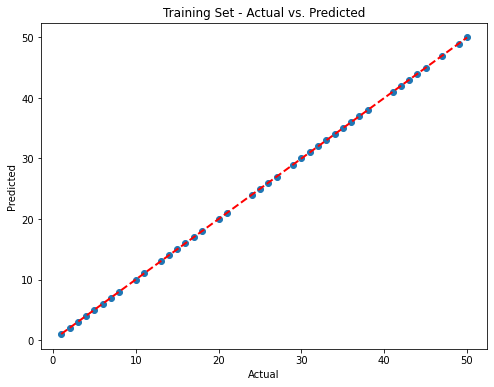

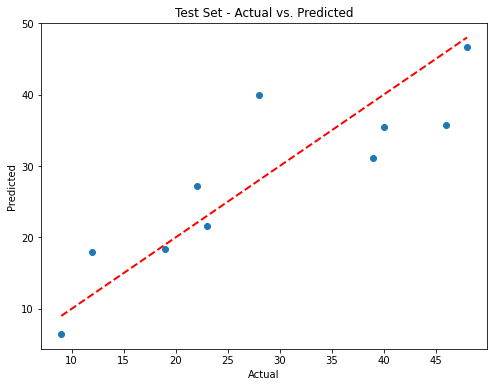

In [29]:
# Membuat grafik prediksi vs. aktual untuk data pelatihan
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_hyperparameter_tuning)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set - Actual vs. Predicted")
plt.show()

# Membuat grafik prediksi vs. aktual untuk data uji
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_hyperparameter_tuning)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set - Actual vs. Predicted")
plt.show()

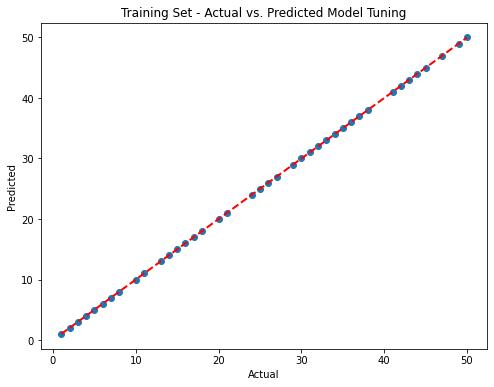

In [30]:
# Membuat grafik prediksi vs. aktual untuk data pelatihan
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_hyperparameter_tuning)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Training Set - Actual vs. Predicted Model Tuning")
plt.savefig("training_plot_model_tuning.png")
plt.show()

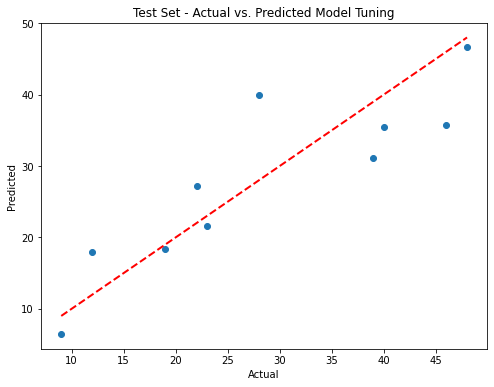

In [31]:
# Membuat grafik prediksi vs. aktual untuk data uji
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_hyperparameter_tuning)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Test Set - Actual vs. Predicted Model Tuning")
plt.savefig("test_plot_model_tuning.png")
plt.show()